In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
# from matplotlib.colors import LogNorm

# import matplotlib.lines as mlines # needed for custom legend
# import matplotlib.font_manager as fm # needed to export editable text
# from scipy import stats
# import random

# needed for editable text in svg format
plt.rcParams['svg.fonttype'] = 'none'

from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script


# for binarization
from sklearn.preprocessing import binarize


# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/figure_pics/'

#### load data
omc_bin = pd.read_pickle(in_path+"M194_M220_OMC_bin4.pkl")

#### load data
omc_countN = pd.read_pickle(in_path+"M194_M220_OMC_countN4.pkl")


##### load seperated data
# Load normalized count data - minimum intervention

omc_count_sep = pd.read_pickle(in_path + 'M194_M220_OMC_separate_all_count.pkl')

omc_countN_sep = pd.read_pickle(in_path + 'M194_M220_OMC_separate_all_countN.pkl')



# Data Processing

In [3]:
# initial processing
# bin processing
# omc_clean = [clean_up_data(df) for df in omc_bin]
# omc_type = [sort_by_celltype(df) for df in omc_clean]
# omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# # countN processing
# omc_cleanN = [clean_up_data(df) for df in omc_countN]
# omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
# omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



In [4]:
mm_count = 0
st_count = 0
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"]=="MMus":
        mm_count += omc_bin[i].shape[0]
    else:
        st_count += omc_bin[i].shape[0]

print("mmus total barcodes:", mm_count)
print("steg total barcodes:", st_count)

mmus total barcodes: 71704
steg total barcodes: 5114


In [5]:
# initial processing
# bin processing

# convert to bin

omc_bin_sep = [pd.DataFrame(binarize(df, threshold=4), columns=df.columns) for df in omc_count_sep]

# clean up data
drop = ["OB", "ACAi", "ACAc", "HIP"]
omc_clean_sep = [df.copy().drop(drop, axis=1) for df in omc_bin_sep]

it_areas = ['AOMCc', 'POMCc', 'AUD', 'STRd', 'STRv']
pt_areas = ['HY', 'AMY', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']
omc_type_sep = [sort_by_celltype(df, it_areas=it_areas, pt_areas=pt_areas) for df in omc_clean_sep]
# omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median
omc_type_sep[0]


,AOMCi,POMCi,AOMCc,POMCc,AUD,STRd,STRv,TH,HY,AMY,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,type
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11739,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,PT
11740,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PT
11741,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PT
11742,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PT


# isolate PAG neurons

In [6]:
# first, isolate PT cells

pt_type = [df[df['type']=="PT"] for df in omc_type_sep]
pt_pag = []
for i in range(metadata.shape[0]):
    df = pt_type[i]
    apagd = df[df["APAGd"]==1]
    apagv = df[df["APAGv"]==1]
    ppagd = df[df["PPAGd"]==1]
    ppagv = df[df["PPAGv"]==1]
    pt_pag.append(pd.concat([apagd, apagv, ppagd, ppagv]))


mm_pt = []
st_pt = []
mm_pag = []
st_pag = []
for i in range(metadata.shape[0]):
    if metadata.loc[i, "species"]=="MMus":
        mm_pt.append(pt_type[i])
        mm_pag.append(pt_pag[i])
    else:
        st_pt.append(pt_type[i])
        st_pag.append(pt_pag[i])


mm_pag_all = pd.concat(mm_pag).reset_index(drop=True)
st_pag_all = pd.concat(st_pag).reset_index(drop=True)


# stacked bar chart

In [7]:
print("Mouse", "\t", "species", "PAG Neurons")
print("----------------------------")
for i in range(metadata.shape[0]):
    print(metadata.loc[i,"mice"], "\t", metadata.loc[i,"species"], "\t", pt_pag[i].shape[0])

Mouse 	 species PAG Neurons
----------------------------
MMM1 	 MMus 	 23
MMF2 	 MMus 	 206
MMF3 	 MMus 	 109
STM1 	 STeg 	 20
STM2 	 STeg 	 13
STF3 	 STeg 	 15
MMM4 	 MMus 	 57
MMF5 	 MMus 	 1312
STF4 	 STeg 	 93
STM5 	 STeg 	 120
STF6 	 STeg 	 150
STM7 	 STeg 	 226


In [8]:
plot_stack = pd.DataFrame(columns=["APAGd", "APAGv", "PPAGd", "PPAGv"], index=["MMus", "STeg"])

mm_sum = mm_pag_all.sum()
st_sum = st_pag_all.sum()

plot_stack.loc["MMus", :] = [mm_sum["APAGd"], mm_sum["APAGv"], mm_sum["PPAGd"], mm_sum["PPAGv"]]
plot_stack.loc["STeg", :] = [st_sum["APAGd"], st_sum["APAGv"], st_sum["PPAGd"], st_sum["PPAGv"]]
plot_stack_prop = plot_stack.copy()

plot_stack_prop.loc["MMus",:] = plot_stack_prop.loc["MMus",:]/mm_pag_all.shape[0]
plot_stack_prop.loc["STeg",:] = plot_stack_prop.loc["STeg",:]/st_pag_all.shape[0]
plot_stack_prop

,APAGd,APAGv,PPAGd,PPAGv
MMus,0.009959,0.861746,0.008787,0.474517
STeg,0.094192,0.875981,0.032967,0.734694


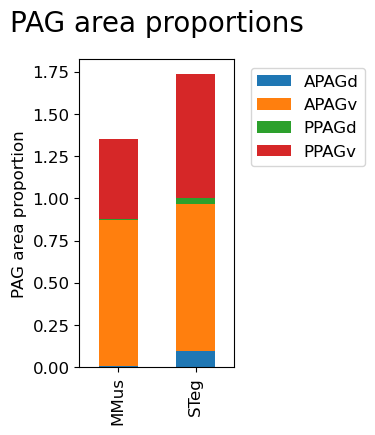

In [10]:

plot_stack_prop.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.rcParams.update({'font.size': 12})
fig = plt.gcf()
fig.set_size_inches((2,4))
plt.ylabel("PAG area proportion")
plt.title("PAG area proportions", size=20, pad=20)
plt.savefig(out_path+"PAG_areas_stacked.svg", dpi=300, bbox_inches="tight")
plt.show()